In [1]:
using ClimaAnalysis
using CairoMakie
using Statistics

(size(ta.data))[1] = 1017


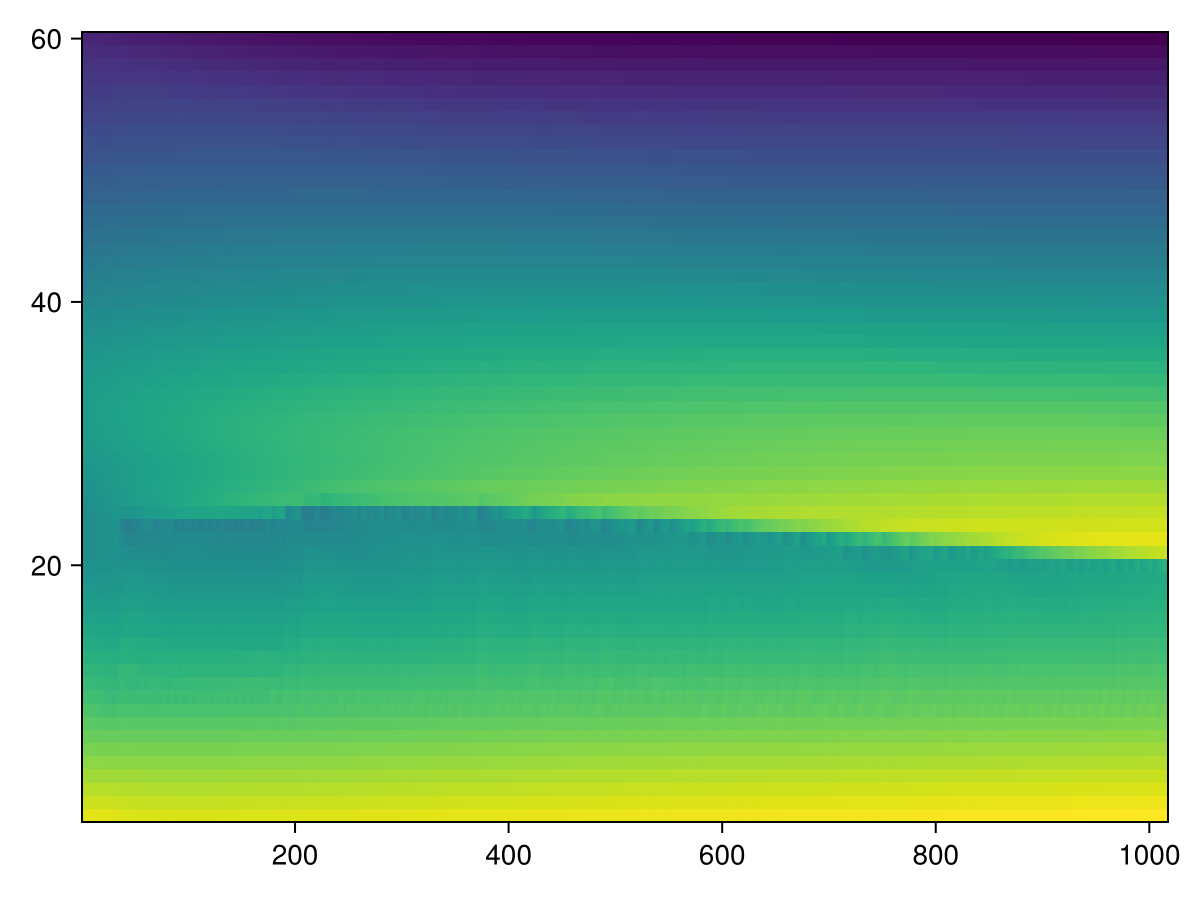

In [8]:
simdir = SimDir(joinpath("output", "gcm_driven_scm", "output_active"))
#println(summary(simdir))
ta = get(simdir; short_name = "ta", reduction="inst",  period = "10m")
# check shape 
@show size(ta.data)[1]
#cl = get(simdir; short_name = "cl", period = "10m")
clw = get(simdir; short_name = "clw", reduction="inst", period = "10m")
# waup = get(simdir; short_name = "waup", reduction = "average", period = "1d")
# clwup = get(simdir; short_name = "clwup", reduction = "average", period = "1d")
heatmap(ta.data[:, 1, 1, :])

In [20]:
ta.data

1017×2×2×60 Array{Float32, 4}:
[:, :, 1, 1] =
 296.676  296.676
 297.622  297.622
 297.657  297.657
 297.679  297.679
 297.694  297.694
 297.702  297.702
 297.706  297.706
 297.706  297.706
 297.705  297.705
 297.703  297.703
 297.701  297.701
 297.698  297.698
 297.695  297.695
   ⋮      
 298.551  298.551
 298.556  298.556
 298.556  298.556
 298.558  298.558
 298.572  298.572
 298.58   298.58
 298.577  298.577
 298.568  298.568
 298.56   298.56
 298.556  298.556
 298.556  298.556
 298.559  298.559

[:, :, 2, 1] =
 296.676  296.676
 297.622  297.622
 297.657  297.657
 297.679  297.679
 297.694  297.694
 297.702  297.702
 297.706  297.706
 297.706  297.706
 297.705  297.705
 297.703  297.703
 297.701  297.701
 297.698  297.698
 297.695  297.695
   ⋮      
 298.551  298.551
 298.556  298.556
 298.556  298.556
 298.558  298.558
 298.572  298.572
 298.58   298.58
 298.577  298.577
 298.568  298.568
 298.56   298.56
 298.556  298.556
 298.556  298.556
 298.559  298.559

[:, :, 1, 2] =
 295

In [19]:
mean(ta.data, dims=(2,3))

1017×1×1×60 Array{Float32, 4}:
[:, :, 1, 1] =
 296.67633
 297.6218
 297.65665
 297.67926
 297.69382
 297.70218
 297.70572
 297.7062
 297.70508
 297.7032
 297.7008
 297.6981
 297.69504
   ⋮
 298.55145
 298.5563
 298.55576
 298.55783
 298.57156
 298.58035
 298.5767
 298.5682
 298.5601
 298.55615
 298.5558
 298.5593

[:, :, 1, 2] =
 295.99133
 296.8941
 296.8973
 296.90836
 296.91922
 296.92834
 296.9352
 296.93954
 296.94174
 296.94208
 296.94122
 296.93942
 296.93704
   ⋮
 298.05145
 298.04703
 298.04675
 298.05167
 298.05652
 298.05438
 298.05295
 298.0551
 298.06036
 298.0651
 298.0679
 298.0676

[:, :, 1, 3] =
 295.33493
 296.2416
 296.22885
 296.22098
 296.22128
 296.22614
 296.23206
 296.2375
 296.2414
 296.24362
 296.24454
 296.24423
 296.24326
   ⋮
 297.41223
 297.41043
 297.41046
 297.42435
 297.4285
 297.42007
 297.41327
 297.40866
 297.4088
 297.41333
 297.4202
 297.42474

;;;; … 

[:, :, 1, 58] =
 280.5602
 279.879
 279.88156
 279.88406
 279.88647
 279.88885
 279.89108
 279.8

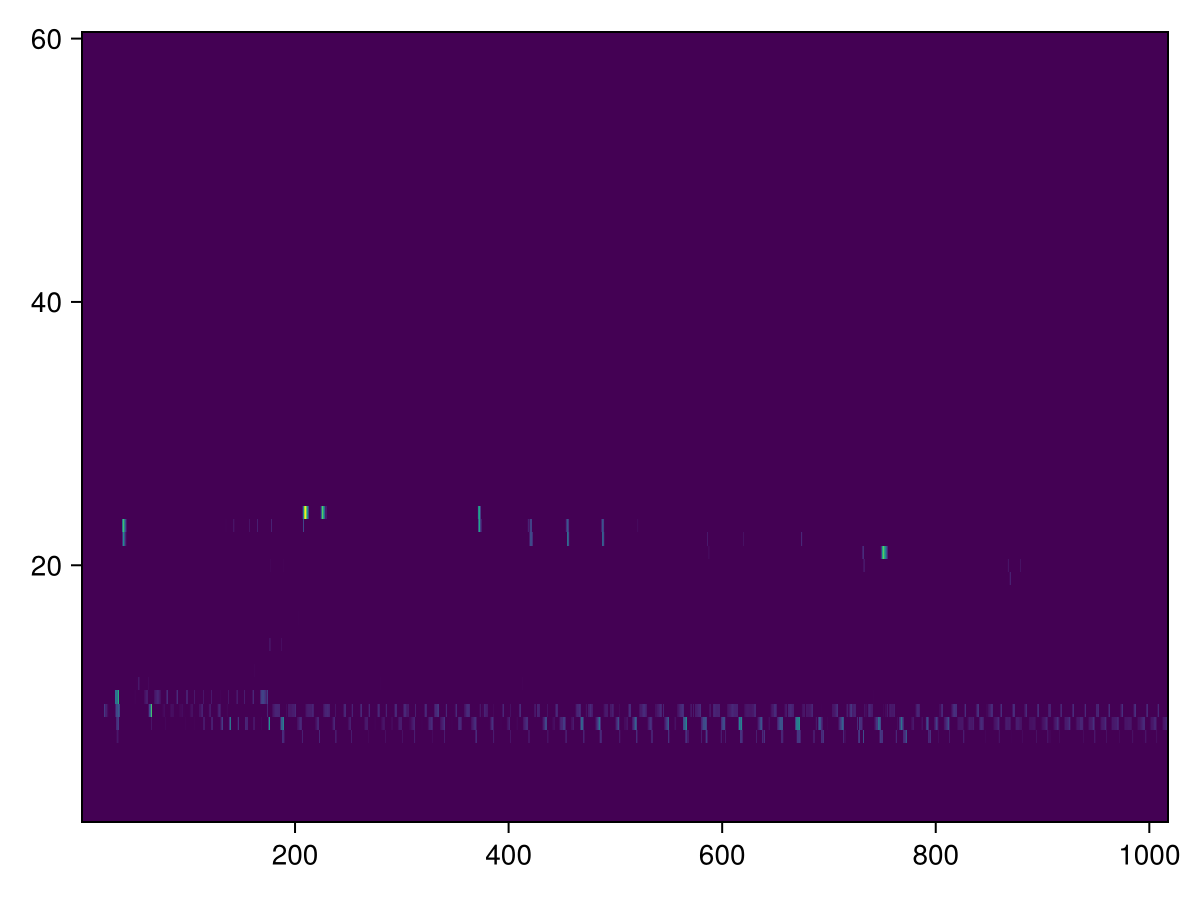

In [6]:
heatmap(clw.data[:, 1, 1, :])

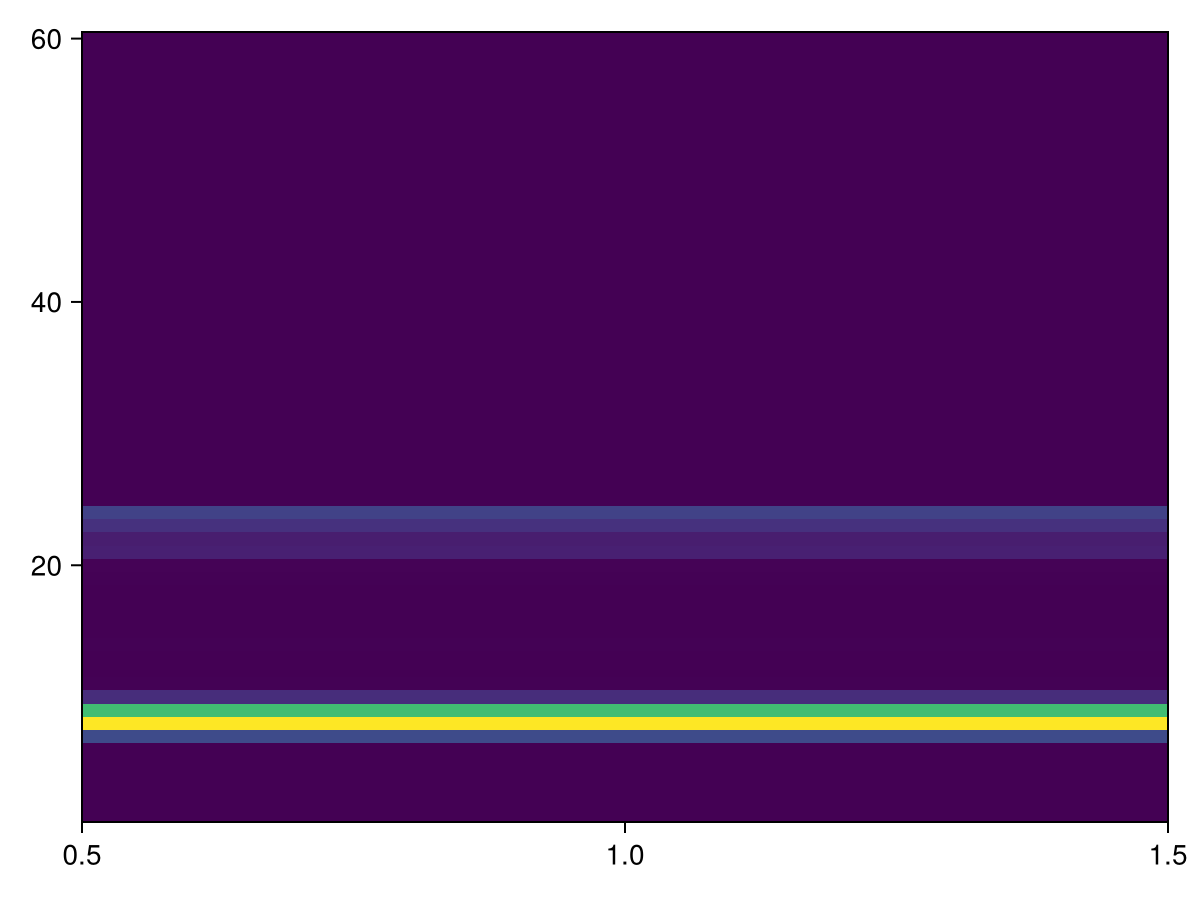

In [13]:
plot(mean(clw.data[:, 1, 1, :], dims=1))

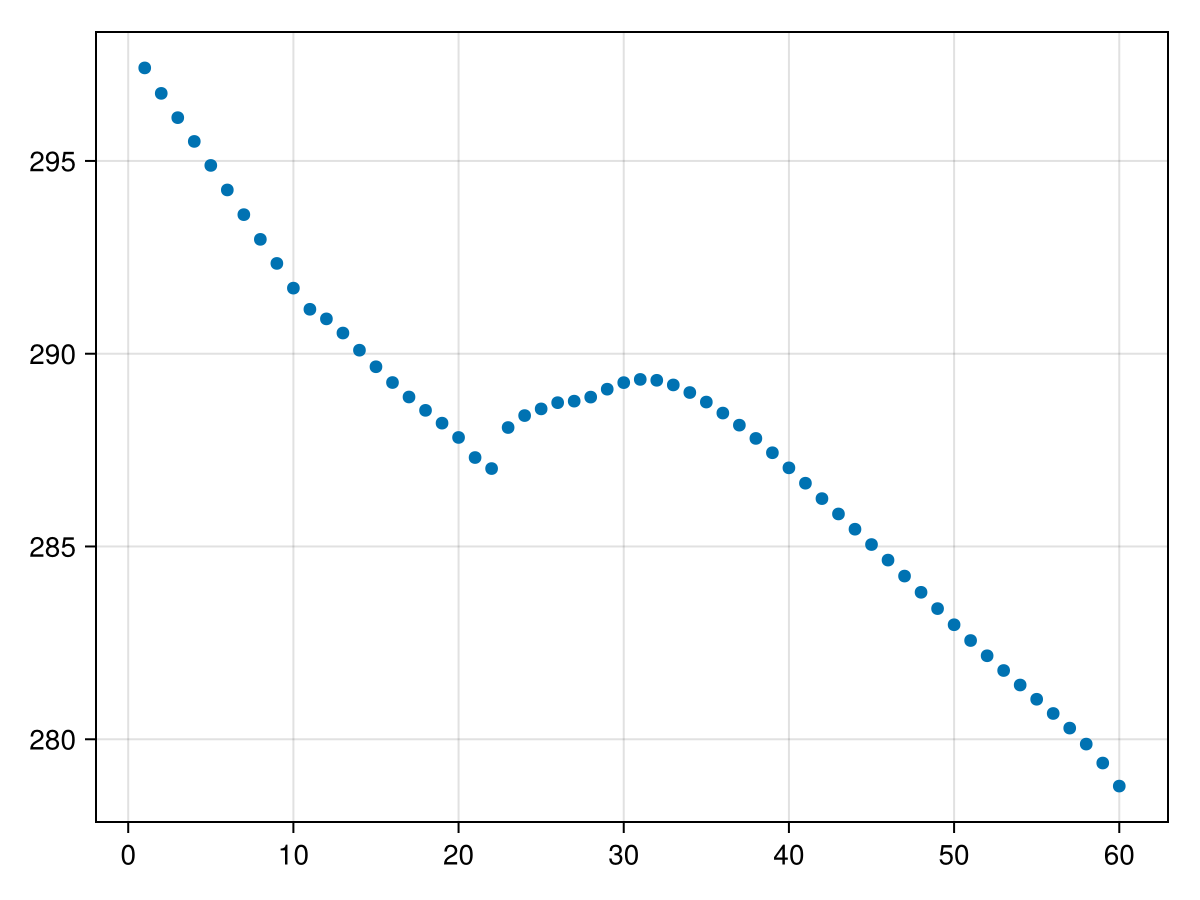

In [14]:
plot(ta.data[end-1, 1, 1, :])

In [54]:
using LinearAlgebra
function H_perf(dir::String, short_names; noise = 0.01, cutoff=50, output_cov = true)
    """Single Variable Calibration"""
	simdir = ClimaAnalysis.SimDir(joinpath(dir, "output_active")) # allow for flexibility in choosing data directory
    means = []
    for short_name in short_names
        obs = ClimaAnalysis.get(simdir; short_name = short_name, period = "10m")
    
        # compute data
        obs_dat = reshape(mean(obs.data[cutoff:end, :, :, :], dims=(2,3)), size(obs.data)[1]-cutoff+1, size(obs.data)[end])
        # compute time mean
        obs_mean = vec(mean(obs_dat, dims=1))

        # normalize 
        obs_mean = (obs_mean .- mean(obs_mean)) ./ std(obs_mean)
        # compute covariance if required
        append!(means, obs_mean)
    end
    if output_cov 
        obs_cov = noise .* Matrix(I, length(means), length(means))
        return means, obs_cov
    else
        return means
    end
end	

obs_mean, obs_cov = H_perf("../explore_loss_functions/output/obs_ta_0.001/iteration_000/member_001", ["ta", "hus", "clw"], cutoff=1)

(Any[2.1341918f0, 2.0219626f0, 1.9144336f0, 1.8078843f0, 1.7020408f0, 1.5963616f0, 1.507332f0, 1.4140748f0, 1.3045588f0, 1.1987768f0  …  -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0, -0.25202885f0], [0.01 0.0 … 0.0 0.0; 0.0 0.01 … 0.0 0.0; … ; 0.0 0.0 … 0.01 0.0; 0.0 0.0 … 0.0 0.01])

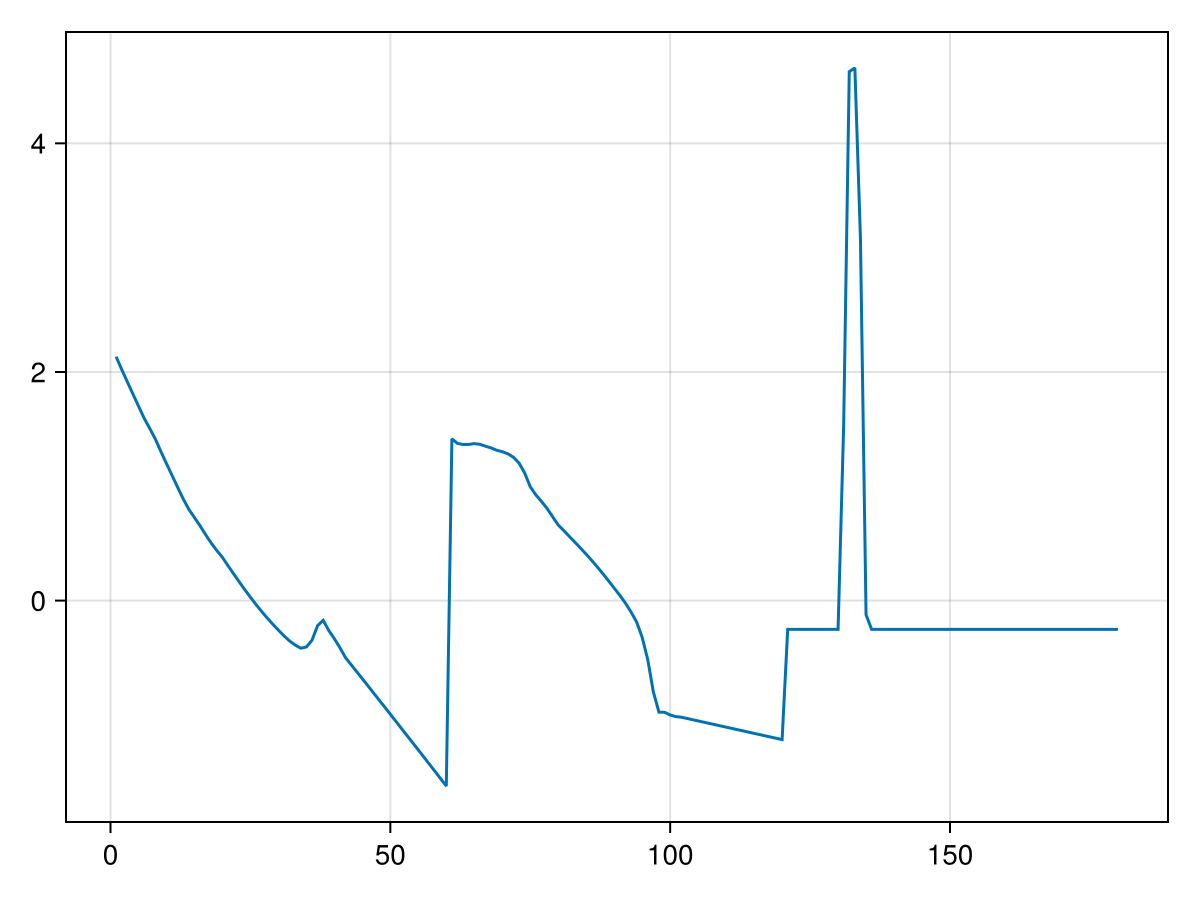

In [56]:
lines(obs_mean)
# heatmap(obs_cov)

In [44]:
simdir = ClimaAnalysis.SimDir(joinpath("../explore_loss_functions/output/obs_ta_0.001/iteration_000/member_007", "output_active"))
obs = ClimaAnalysis.get(simdir; short_name = "ts", period = "10m")
obs_dat = vec(mean(obs.data[1:end, :, :], dims=(2,3)))
obs_mean = vec(mean(obs_dat, dims=1))
# normalize
obs_mean = (obs_mean .- mean(obs_mean)) ./ std(obs_mean)
println(obs_mean)
# print(obs_dat)
# fig, ax= lines(obs_dat)
# xlims!(299, 302)
# fig

Float32[NaN]


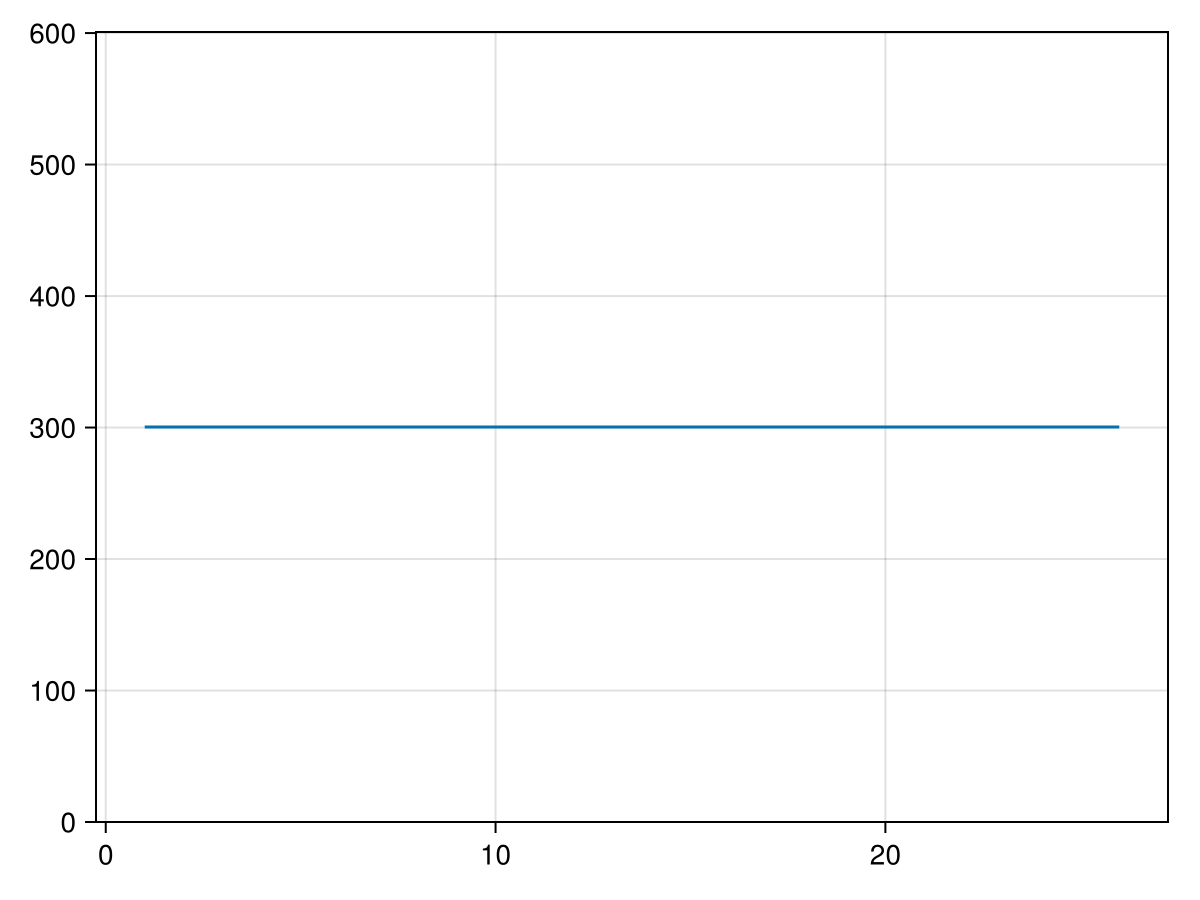